In [1]:
import sys
import os.path
import math
import numpy as np
import pandas as pd
import wave
import struct
import string
import pathlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.backends.backend_pdf import PdfPages
from collections import OrderedDict
from scipy import signal

# ディレクトリの絶対パスを取得
current_dir = os.path.dirname(os.path.abspath("__file__"))
# モジュールのあるパスを追加
sys.path.append( str(current_dir) + '/../../programs' )

get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline

plt.rcParams['font.family'] ='IPAPGothic' #使用するフォント
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.top'] = True #x軸の目盛線の上側を表示
plt.rcParams['ytick.right'] = True #y軸の目盛線の右側を表示
plt.rcParams['xtick.major.width'] = 1.0 #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0 #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 11 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0 #軸の線幅edge linewidth。囲みの太さ
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['figure.dpi'] = 100 #dpiの設定
plt.rcParams['figure.subplot.hspace'] = 0.3 # 図と図の幅
plt.rcParams['figure.subplot.wspace'] = 0.3 # 図と図の幅

fig = plt.figure(figsize=(8, 11))

<Figure size 800x1100 with 0 Axes>

In [2]:
from plot_tool import plot_3charts

<Figure size 800x1100 with 0 Axes>

In [3]:
N = 1024            # サンプル数
fs = 1000
dt = 1/fs            # サンプリング周期 [s]
f1, f2, f3 = 10, 60, 300 # 周波数 [Hz]

t = np.arange(0, N*dt, dt) # 時間 [s]
x = 3*np.sin(2*np.pi*f1*t) + 0.3*np.sin(2*np.pi*f2*t) + 0.2*np.sin(2*np.pi*f3*t) # 信号

### Design a filter
`scipy.signal.firwin(numtaps, cutoff, width=None, 
                    window='hamming', pass_zero=True, 
                    scale=True, nyq=None, fs=None)`

In [4]:
filter1 = signal.firwin(numtaps=51, cutoff=40, width=None, 
                            window='hamming', pass_zero=True, 
                            scale=True, nyq=None, fs=1/dt)

### Adapt a filter
`scipy.signal.lfilter(b, a, x, axis=-1, zi=None)`
$$
\displaystyle  H(z)=\frac{\sum_{k=0}^{M} b_k z^{-k} } {\sum_{k=0}^{N}  a_k z^{-k} } 
$$

In [5]:
y1 = signal.lfilter(filter1, 1, x)

In [6]:
F1 = np.fft.fft(y1)
Amp1 = np.abs(F1/(N/2))

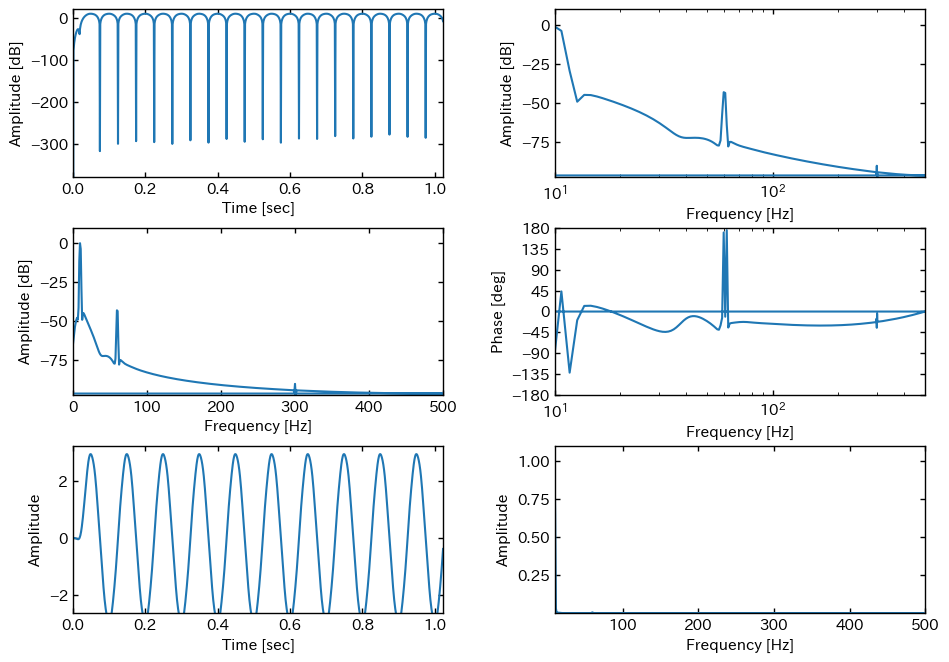

In [7]:
plot_3charts(N=N, y=y1, fs=fs, start_sec=0, window_func_name="hamming")

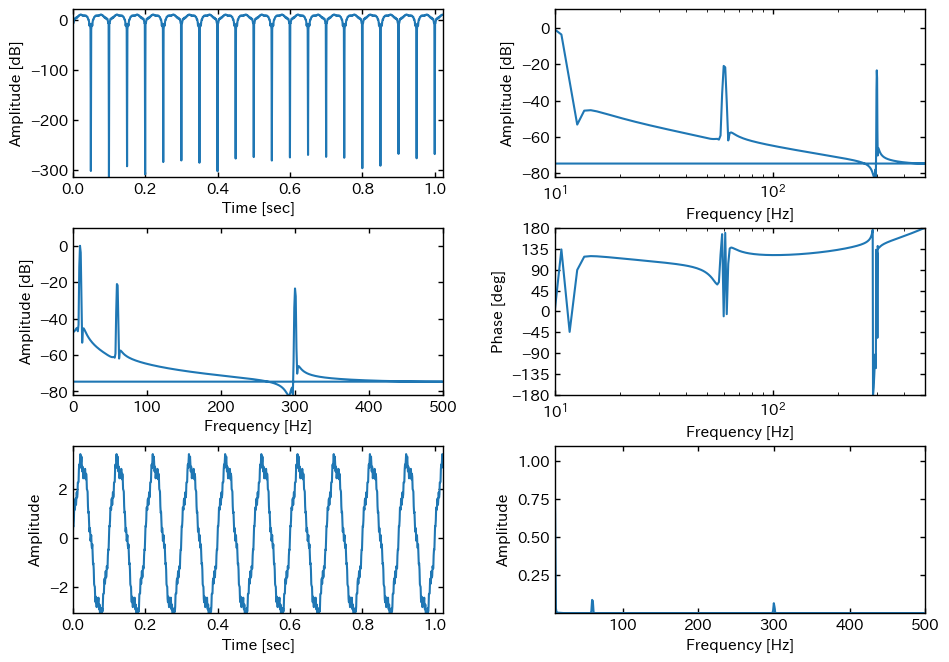

In [8]:
plot_3charts(N=N, y=x, fs=fs, start_sec=0, window_func_name="hamming")

In [9]:
filter2 = signal.firwin(numtaps=51, cutoff=100, fs=fs, pass_zero=False)
y2 = signal.lfilter(filter2, 1, x)

F2 = np.fft.fft(y2)
Amp2 = np.abs(F2/(N/2))

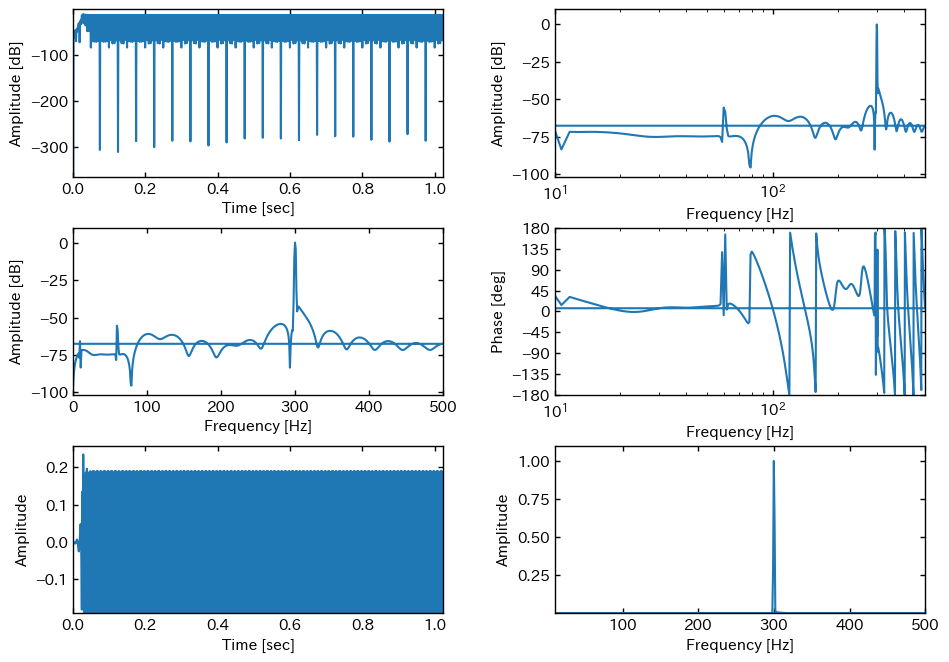

In [10]:
plot_3charts(N=N, y=y2, fs=fs, start_sec=0, window_func_name="hamming")

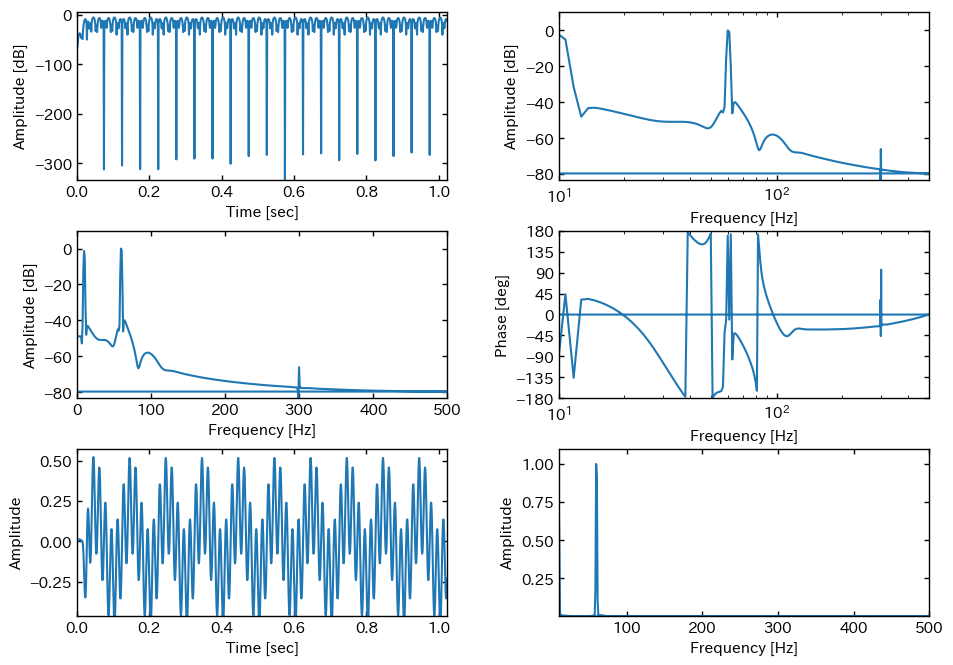

In [11]:
filter3 = signal.firwin(numtaps=51, cutoff=[30, 100], fs=1/dt, pass_zero=False)
y3 = signal.lfilter(filter3, 1, x)

F3 = np.fft.fft(y3)
Amp3 = np.abs(F3/(N/2))
plot_3charts(N=N, y=y3, fs=fs, start_sec=0, window_func_name="hamming")